In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype(np.float64)/255.0
x_test = x_test.astype(np.float64)/255.0

In [23]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), 
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [24]:
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), 
            metrics=['accuracy'])
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 0.2344 - accuracy: 0.9280 - val_loss: 0.0487 - val_accuracy: 0.9842
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0281 - val_accuracy: 0.9919
Epoch 

In [25]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9929


[0.048055920749902725, 0.992900013923645]

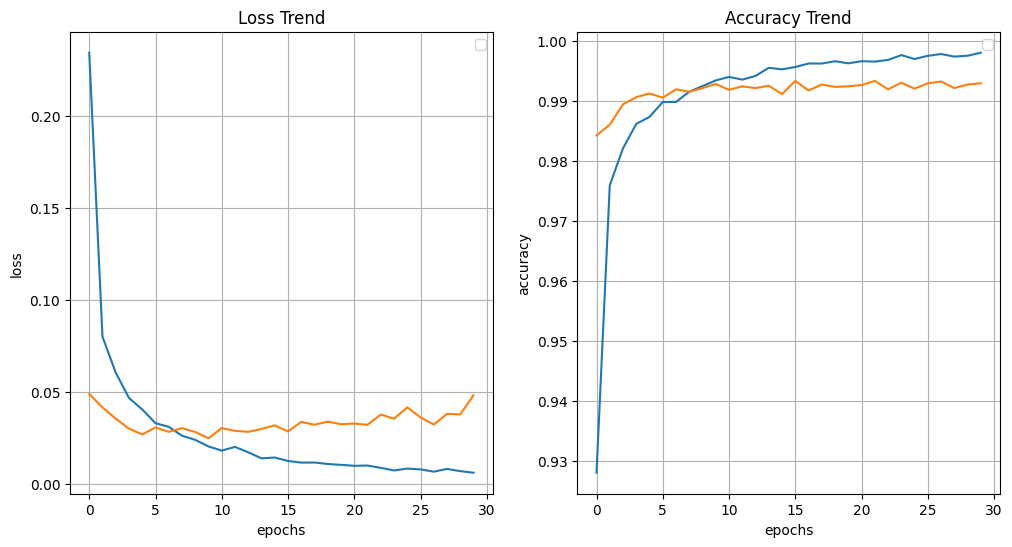

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.show()